**Problem 1: Draw the moral graph, triangulated graph and the junction tree. Explain why the "running intersection property" is satisfied in your junction tree.**

In [26]:
from pgmpy.models import BayesianModel
G = BayesianModel()

In [27]:
G.add_edges_from([('asia','tub'),('tub','either'),('smoke','lung'),('smoke','bronc'),('lung','either'),('either','xray'),('either','dysp'),('bronc','dysp')])

In [28]:
import networkx as nx
import matplotlib.pyplot as plt


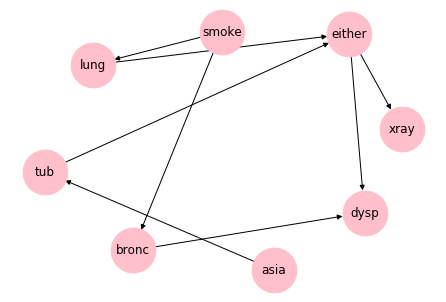

In [29]:
nx.draw(G, with_labels=True,node_size=2000,node_color='pink',linewidths=1)
plt.show()

In [30]:
from pgmpy.factors.discrete.CPD import TabularCPD

In [31]:
cpd_asia = TabularCPD('asia',2,values=[[0.01],[0.99]])

cpd_tub = TabularCPD('tub',2,values=[[0.05,0.01],[0.95,0.99]],evidence=['asia'],evidence_card=[2])

cpd_smoke = TabularCPD('smoke',2,values=[[0.5],[0.5]])

cpd_lung = TabularCPD('lung',2,values=[[0.1,0.01],[0.9,0.99]],evidence=['smoke'],evidence_card=[2])

cpd_bronc = TabularCPD('bronc',2,values=[[0.6,0.3],[0.4,0.7]],evidence=['smoke'],evidence_card=[2])

cpd_either = TabularCPD('either',2,values=[[1,1,1,0],[0,0,0,1]],evidence=['lung','tub'],evidence_card=[2,2])

cpd_xray = TabularCPD('xray',2,values=[[0.98,0.05],[0.02,0.95]],evidence=['either'],evidence_card=[2])

cpd_dysp = TabularCPD('dysp',2,values=[[0.9,0.7,0.8,0.1],[0.1,0.3,0.2,0.9]],evidence=['bronc','either'],evidence_card=[2,2])

In [32]:
G.add_cpds(cpd_asia, cpd_smoke, cpd_tub, cpd_lung, cpd_bronc, cpd_either, cpd_xray, cpd_dysp)

In [33]:
for cpd in G.get_cpds():
    print("\nCPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD of asia:
+---------+------+
| asia(0) | 0.01 |
+---------+------+
| asia(1) | 0.99 |
+---------+------+

CPD of smoke:
+----------+-----+
| smoke(0) | 0.5 |
+----------+-----+
| smoke(1) | 0.5 |
+----------+-----+

CPD of tub:
+--------+---------+---------+
| asia   | asia(0) | asia(1) |
+--------+---------+---------+
| tub(0) | 0.05    | 0.01    |
+--------+---------+---------+
| tub(1) | 0.95    | 0.99    |
+--------+---------+---------+

CPD of lung:
+---------+----------+----------+
| smoke   | smoke(0) | smoke(1) |
+---------+----------+----------+
| lung(0) | 0.1      | 0.01     |
+---------+----------+----------+
| lung(1) | 0.9      | 0.99     |
+---------+----------+----------+

CPD of bronc:
+----------+----------+----------+
| smoke    | smoke(0) | smoke(1) |
+----------+----------+----------+
| bronc(0) | 0.6      | 0.3      |
+----------+----------+----------+
| bronc(1) | 0.4      | 0.7      |
+----------+----------+----------+

CPD of either:
+-----------+---------+

In [34]:
moral = G.to_markov_model()
triangulate = moral.triangulate()
junction_tree = triangulate.to_junction_tree()

**Moral Graph**

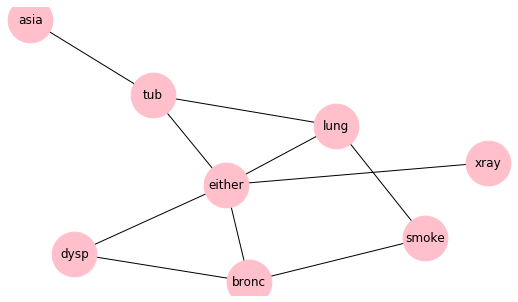

In [39]:
plt.figure(figsize=(7,4))
nx.draw(moral,pos=nx.nx_pydot.graphviz_layout(moral), with_labels=True,node_size=2000,node_color='pink',linewidths=1)
plt.show()

**Triangulate Graph**

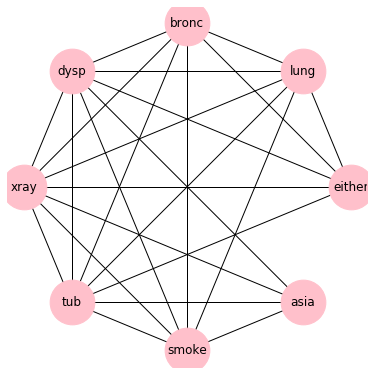

In [41]:
plt.figure(figsize=(5,5))
nx.draw(triangulate,pos=nx.nx_pydot.graphviz_layout(triangulate,prog='circo'), with_labels=True,node_size=2000,node_color='pink',linewidths=1)
plt.show()

**Junction Tree**

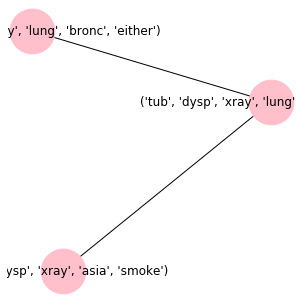

In [42]:
plt.figure(figsize=(4,4))
nx.draw(junction_tree, with_labels=True,node_size=2000,node_color='pink',linewidths=1)
plt.show()

**Printing Junction Tree Nodes**

In [43]:
junction_tree.nodes

NodeView((('tub', 'dysp', 'xray', 'asia', 'smoke'), ('tub', 'dysp', 'xray', 'lung', 'bronc', 'smoke'), ('tub', 'dysp', 'xray', 'lung', 'bronc', 'either')))

**Justifying Running Intersection Property**

If a variable is contained in 2 cliques then it must be contained in all other cliques on the path that connects them. This property makes sure of the consistency of the graph.

In the junction tree above we can see that for instance 'tub','xray' and 'disp' is present in the first and third clique thus those 3 variables are also present in the second clique. Similarly this property is maintained for all other variables.

**Inference from the model using message passing algorithm**

Joint probability of "tub=yes, lung=yes, bronc=yes", given evidence that "asia=yes, xray=yes"

In [44]:
from pgmpy.inference import VariableElimination

infer=VariableElimination(G)

joint_probability = infer.query(variables=['tub','lung','bronc'],evidence={'asia':0,'xray':0},joint=True)

Eliminating: smoke: 100%|██████████| 3/3 [00:00<00:00, 149.86it/s]


In [45]:
print(joint_probability)

+--------+---------+----------+-----------------------+
| tub    | lung    | bronc    |   phi(tub,lung,bronc) |
+========+=========+==========+=======================+
| tub(0) | lung(0) | bronc(0) |                0.0106 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(0) | bronc(1) |                0.0079 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(0) |                0.1413 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(1) |                0.1778 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(0) |                0.2021 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(1) |                0.1508 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(0) |                0.1370 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(1) |                0

Thus from the above table we can infer:

**P(tub='yes',lung='yes',bronc='yes'|asia='yes',xray='yes')=0.0106**

**Problem 2:  Describe how the different terms on the right hand side of "p(V ) = p(a)p(t | a)p(s)p(l | s)p(b | s)p(e | t, l)p(d | e, b)p(x | e)" are distributed among the different juction tree clusters. Write out the messages using these terms and verify that the message passing algorithm indeed gives the cluster marginals.**

In message passing algorithm there are always 3 actors:
1. The Source Cluster
2. The sepset
3. The Destination Cluster

Messages exchanged changes state of potentials in the sepset and destination cluster.
Variables in the source that are not in the sepset are marginalized out and the potential of the sepset is calculated as follows:

$\phi(S)=\sum_{V / S} \phi (V)$ 

The second assignment to the destination cluster potential is as follows:

$\phi(W)=\phi (W) \frac{\phi (S)}{\phi (S) ^{old}}$

where $\phi(S) , \phi(V) , \phi(W)$ denotes potential at sepset, source and destination clique respectively.

For our example junction tree the derivation is shown below:


<div>
<img src="attachment:PB.png" width="500"/>
</div>

<img src="pb1.jpeg" alt="drawing" width="400"/>

The order of variable elimination has been shown in the derivation and junction tree above.

The cliques in the junction tree are :

$\Psi(T,X,D,E,B,L) = P(E|T,L) P(D|E,B) P(X|E) $

$\Psi(T,X,D,S,B,L) = \sum_E \Psi(T,X,D,E,B,L) P(L|S) P(B|S) $

$\Psi(T,X,D,S,A) = \sum_{B,L}\Psi(T,X,D,S,B,L) P(A) P(T|A) P(S)$



As we see from the derivation, a message is passed from Clique 1 to Clique 2 marginalizing over 'either (E)' via the sepset {T,L,B,D,X}. 

Similarly a second message is passed from Clique 2 to Clique 3 marginalizing over 'bronc (B) and lung (L)' via the sepset {T,D,X,S}. 

Finally in Clique 3 the rest of the variables 'tub (T), xray (X), dysp (D),  smoke (S) and asia (A)' are marginalized.

Lastly the final answer is distributed via reverse propagation so that each cluster can know its marginal probability.

Messages between 2 cliques can be in forward and reverse direction as shown in figure by blue and pink colours.

At the end of the algorithm all the clusters have their marginal probabilities.


In [46]:
from pgmpy.inference import BeliefPropagation

In [47]:
propagate=BeliefPropagation(G)

In [48]:
propagate.calibrate()

In [49]:
propagate.get_cliques()

NodeView((('tub', 'dysp', 'xray', 'asia', 'smoke'), ('tub', 'dysp', 'xray', 'lung', 'bronc', 'smoke'), ('tub', 'dysp', 'xray', 'lung', 'bronc', 'either')))

In [50]:
propagate.get_sepset_beliefs()

{frozenset({('tub', 'dysp', 'xray', 'asia', 'smoke'),
            ('tub',
             'dysp',
             'xray',
             'lung',
             'bronc',
             'smoke')}): <DiscreteFactor representing phi(tub:2, dysp:2, xray:2, smoke:2) at 0x1a26ac1b00>,
 frozenset({('tub', 'dysp', 'xray', 'lung', 'bronc', 'either'),
            ('tub',
             'dysp',
             'xray',
             'lung',
             'bronc',
             'smoke')}): <DiscreteFactor representing phi(tub:2, dysp:2, xray:2, lung:2, bronc:2) at 0x1a26aa9ac8>}

**The derivation shown above is verified by calling the belief propagation method in pgmpy showing all the sepsets between each pair of cliques**

**Problem 3: Joint Probability using MCMC Sampling**

In [2]:
import pymc3 as pm
import theano.tensor as T
from theano.compile.ops import as_op
import theano

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
asia_prob = np.array([0.01,0.99]) 
smoke_prob = np.array([0.5,0.5])

tub_prob=np.array([[0.05,0.95],[0.01,0.99]])

lung_prob=np.array([[0.1,0.9],[0.01,0.99]])

bronc_prob=np.array([[0.6,0.4],[0.3,0.7]])

xray_prob=np.array([[0.98,0.02],[0.05,0.95]])

either_prob=np.array([[[1,0],[1,0]],[[1,0],[0,1]]])

dysp_prob=np.array([[[0.9,0.1],[0.7,0.3]],[[0.8,0.2],[0.1,0.9]]])


In [5]:
with pm.Model() as model:
    
  asia = pm.Categorical('asia',p=asia_prob)
  smoke = pm.Categorical('smoke',p=smoke_prob)

  tp=theano.shared(tub_prob)
  tp_0=tp[asia]
  tub=pm.Categorical('tub',p=tp_0)

  lp=theano.shared(lung_prob)
  lp_0=lp[smoke]
  lung=pm.Categorical('lung',p=lp_0)

  bp=theano.shared(bronc_prob)
  bp_0=bp[smoke]
  bronc=pm.Categorical('bronc',p=bp_0)

  ep=theano.shared(either_prob)
  ep_0=ep[lung,tub]
  either=pm.Categorical('either',p=ep_0)

  xp=theano.shared(xray_prob)
  xp_0=xp[either]
  xray=pm.Categorical('xray',p=xp_0)


  dp=theano.shared(dysp_prob)
  dp_0=dp[bronc,either]
  dysp=pm.Categorical('dysp',p=dp_0)

In [6]:
with model:
    trace = pm.sample(10000)

Multiprocess sampling (2 chains in 2 jobs)
BinaryGibbsMetropolis: [asia, smoke, tub, lung, bronc, either, xray, dysp]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:15<00:00, 1319.08draws/s]


In [7]:
print(trace)

<MultiTrace: 2 chains, 10000 iterations, 8 variables>


In [8]:
sliced_trace = trace[1000:]
sliced_trace

<MultiTrace: 2 chains, 9000 iterations, 8 variables>

In [9]:
a=sliced_trace['asia']
s=sliced_trace['smoke']
t=sliced_trace['tub']
l=sliced_trace['lung']
b=sliced_trace['bronc']
e=sliced_trace['either']
x=sliced_trace['xray']
d=sliced_trace['dysp']

In [10]:
list_of_tuples = list(zip(a,s,t,l,b,e,x,d)) 


df = pd.DataFrame(list_of_tuples, columns = ['Asia', 'Smoke','Tub','Lung','Bronc','Either','Xray','Dysp'])  

In [11]:
df.head(5)

,Asia,Smoke,Tub,Lung,Bronc,Either,Xray,Dysp
0,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,0,1
2,1,0,1,1,1,1,1,0
3,1,0,1,1,1,1,1,0
4,1,1,1,1,0,1,1,1


**Displaying the samples along with their frequencies**

In [12]:
df.groupby(['Asia', 'Smoke','Tub','Lung','Bronc','Either','Xray','Dysp']).size().reset_index(name='Count')

,Asia,Smoke,Tub,Lung,Bronc,Either,Xray,Dysp,Count
0,0,0,1,1,0,1,0,0,4
1,0,0,1,1,0,1,0,1,2
2,0,0,1,1,0,1,1,0,34
3,0,0,1,1,0,1,1,1,15
4,0,0,1,1,1,1,0,1,6
5,0,0,1,1,1,1,1,0,3
6,0,0,1,1,1,1,1,1,27
7,0,1,1,1,0,1,1,0,26
8,0,1,1,1,0,1,1,1,4
9,0,1,1,1,1,1,0,1,2


**Yes=0 and No=1**

**Since all 'No' has the highest count we will calculate joint probability of P(A=No,S=No,T=No,L=No,B=No,X=No,D=No,E=No)= 0.2903**

**Confirming that the sample with second highest frequency has lesser joint probability:**

**P(A=No,S=yes,T=No,L=No,B=yes,X=No,D=yes,E=No)= 0.176**

Reference:

http://pgmpy.org/models.html#module-pgmpy.models.BayesianModel

http://pgmpy.org/inference.html

https://gist.github.com/tbsexton/1349864212b25cce91dbe5e336d794b4